In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 


C:\Users\Sineth\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Sineth23/Insurance-Dataset/main/train.csv', index_col=None)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [83]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [84]:
pd.DataFrame(data.describe())

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [85]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# Visualizations

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


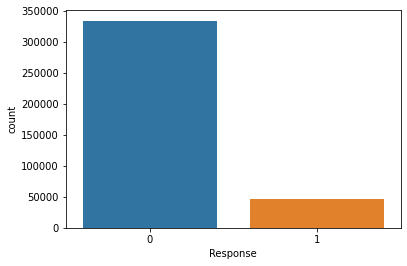

In [86]:
sns.countplot(data.Response)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


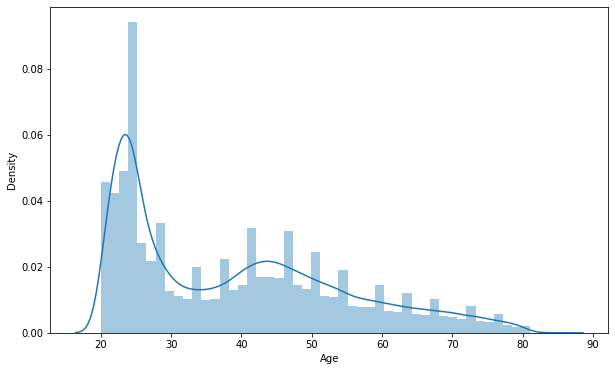

In [87]:
f, ax = plt.subplots(figsize=(10, 6))

sns.distplot(data.Age)

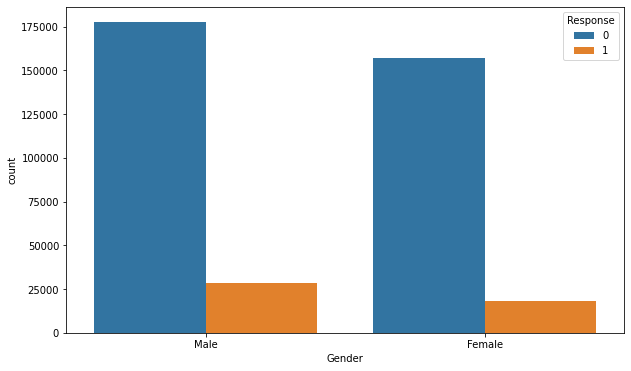

In [88]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=data, x='Gender', hue='Response')





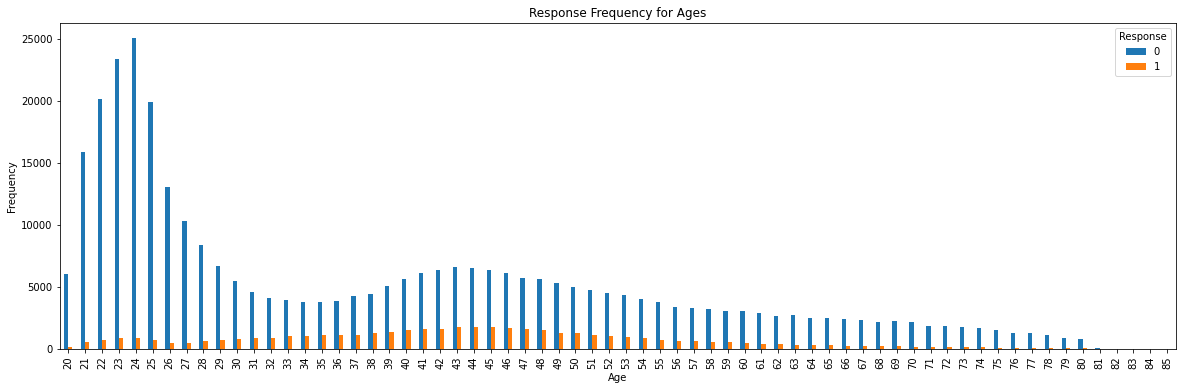

In [89]:
pd.crosstab(data.Age,data.Response).plot(kind="bar",figsize=(20,6))
plt.title('Response Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

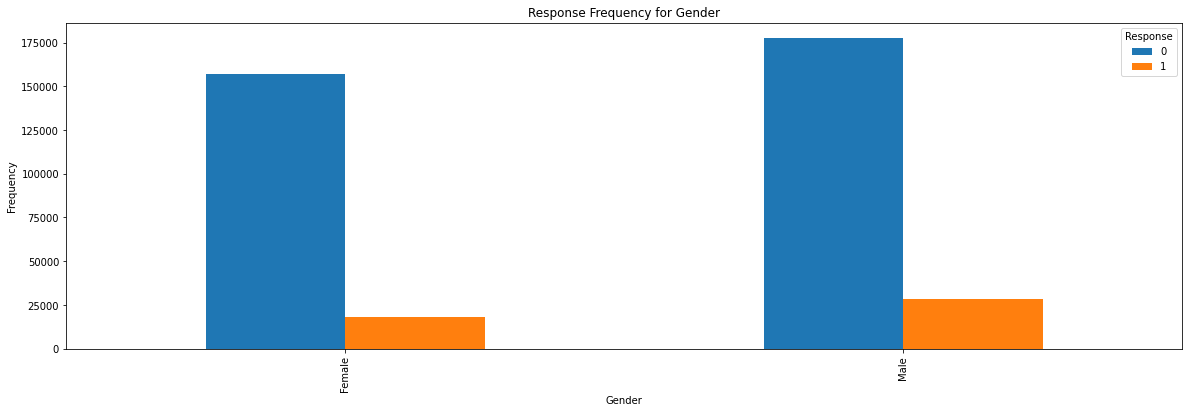

In [90]:
pd.crosstab(data.Gender,data.Response).plot(kind="bar",figsize=(20,6))
plt.title('Response Frequency for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


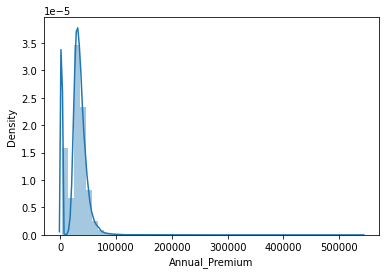

In [91]:
sns.distplot(data.Annual_Premium)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


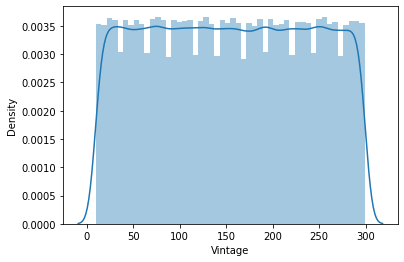

In [92]:
sns.distplot(data.Vintage)

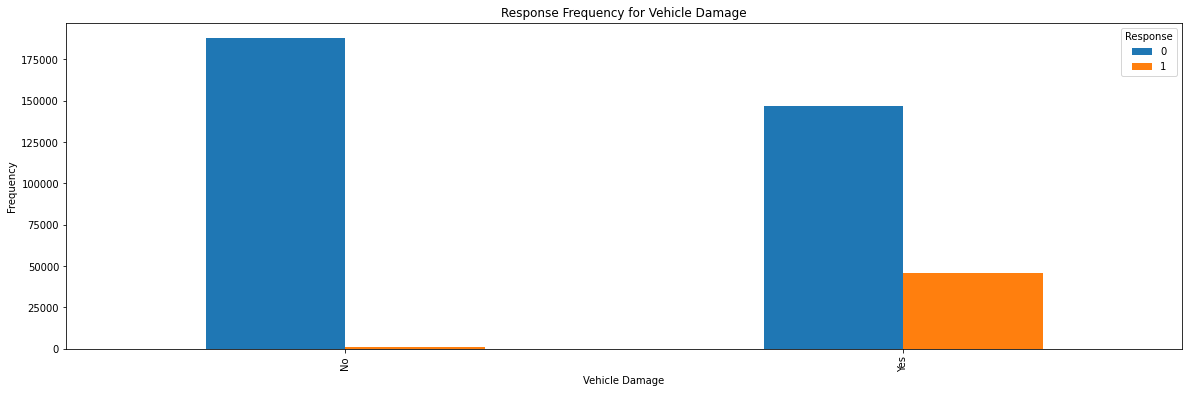

In [93]:
pd.crosstab(data.Vehicle_Damage,data.Response).plot(kind="bar",figsize=(20,6))
plt.title('Response Frequency for Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Frequency')
plt.show()

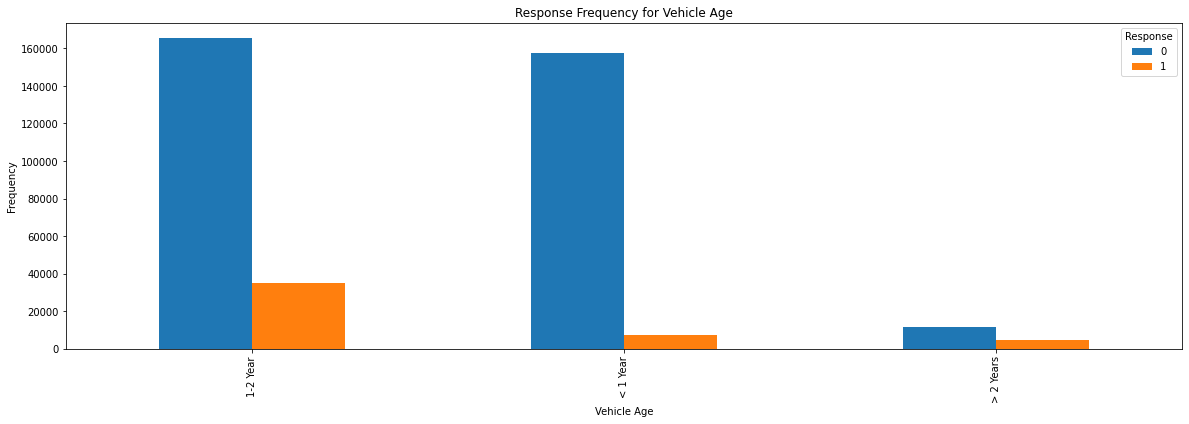

In [94]:
pd.crosstab(data.Vehicle_Age,data.Response).plot(kind="bar",figsize=(20,6))
plt.title('Response Frequency for Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Frequency')
plt.show()

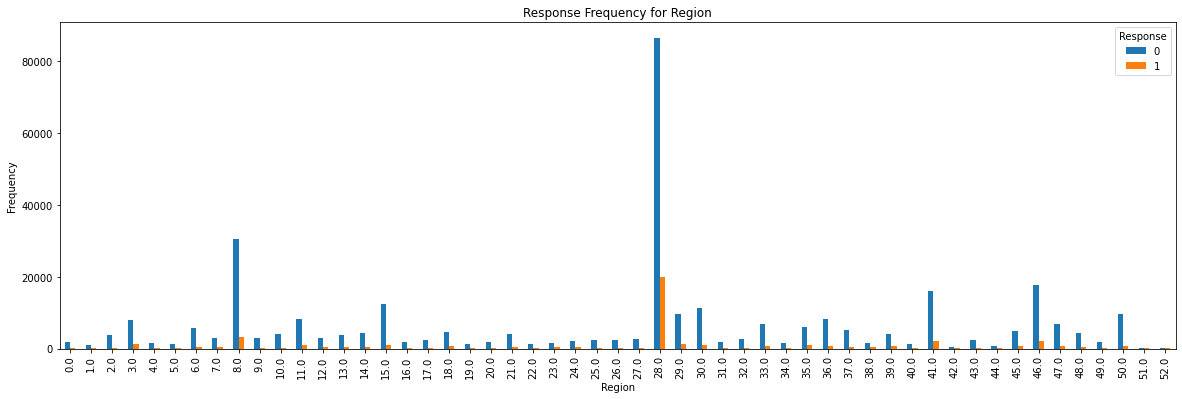

In [95]:
pd.crosstab(data.Region_Code,data.Response).plot(kind="bar",figsize=(20,6))
plt.title('Response Frequency for Region')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

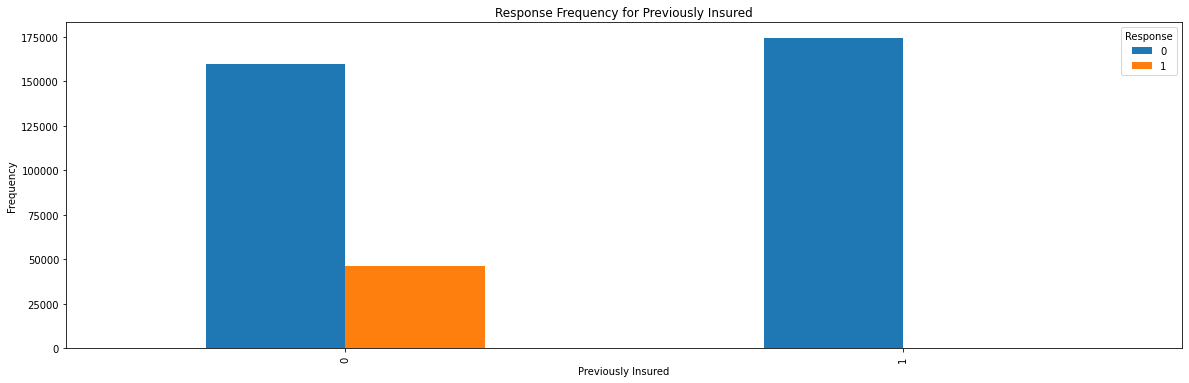

In [96]:

pd.crosstab(data.Previously_Insured,data.Response).plot(kind="bar",figsize=(20,6))
plt.title('Response Frequency for Previously Insured')
plt.xlabel('Previously Insured')
plt.ylabel('Frequency')
plt.show()

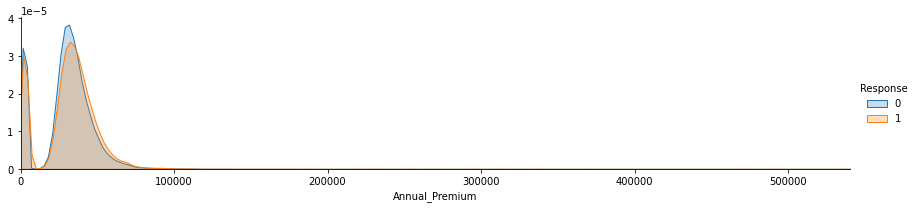

In [97]:
facet = sns.FacetGrid(data,hue="Response",aspect = 4)
facet.map(sns.kdeplot,"Annual_Premium",shade = True)
facet.set(xlim = (0, data["Annual_Premium"].max()))
facet.add_legend()
plt.show()

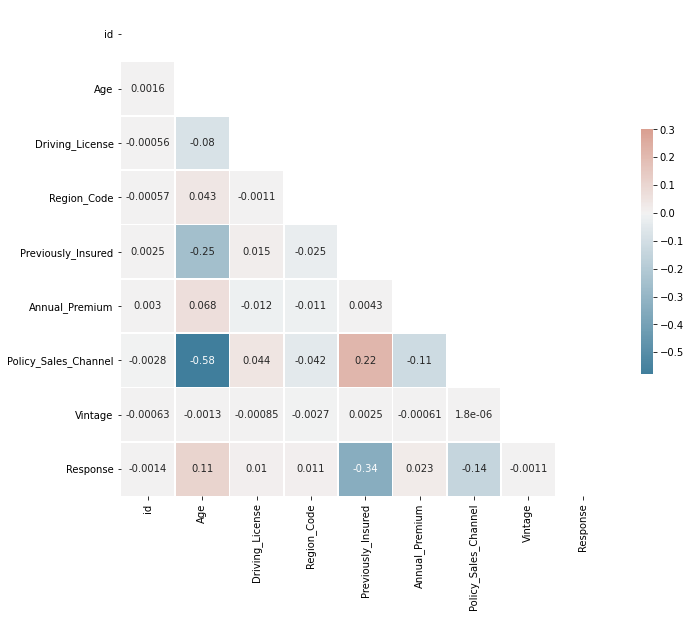

In [98]:

corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

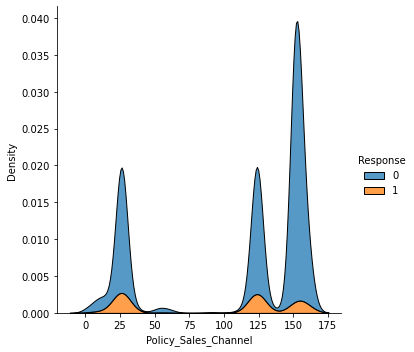

In [99]:
sns.displot(data, x="Policy_Sales_Channel", hue="Response", kind="kde", multiple="stack")


# Feature Engineering

In [7]:
df = data.iloc[0:30000]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
id                      30000 non-null int64
Gender                  30000 non-null object
Age                     30000 non-null int64
Driving_License         30000 non-null int64
Region_Code             30000 non-null float64
Previously_Insured      30000 non-null int64
Vehicle_Age             30000 non-null object
Vehicle_Damage          30000 non-null object
Annual_Premium          30000 non-null float64
Policy_Sales_Channel    30000 non-null float64
Vintage                 30000 non-null int64
Response                30000 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 2.7+ MB


C:\Users\Sineth\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


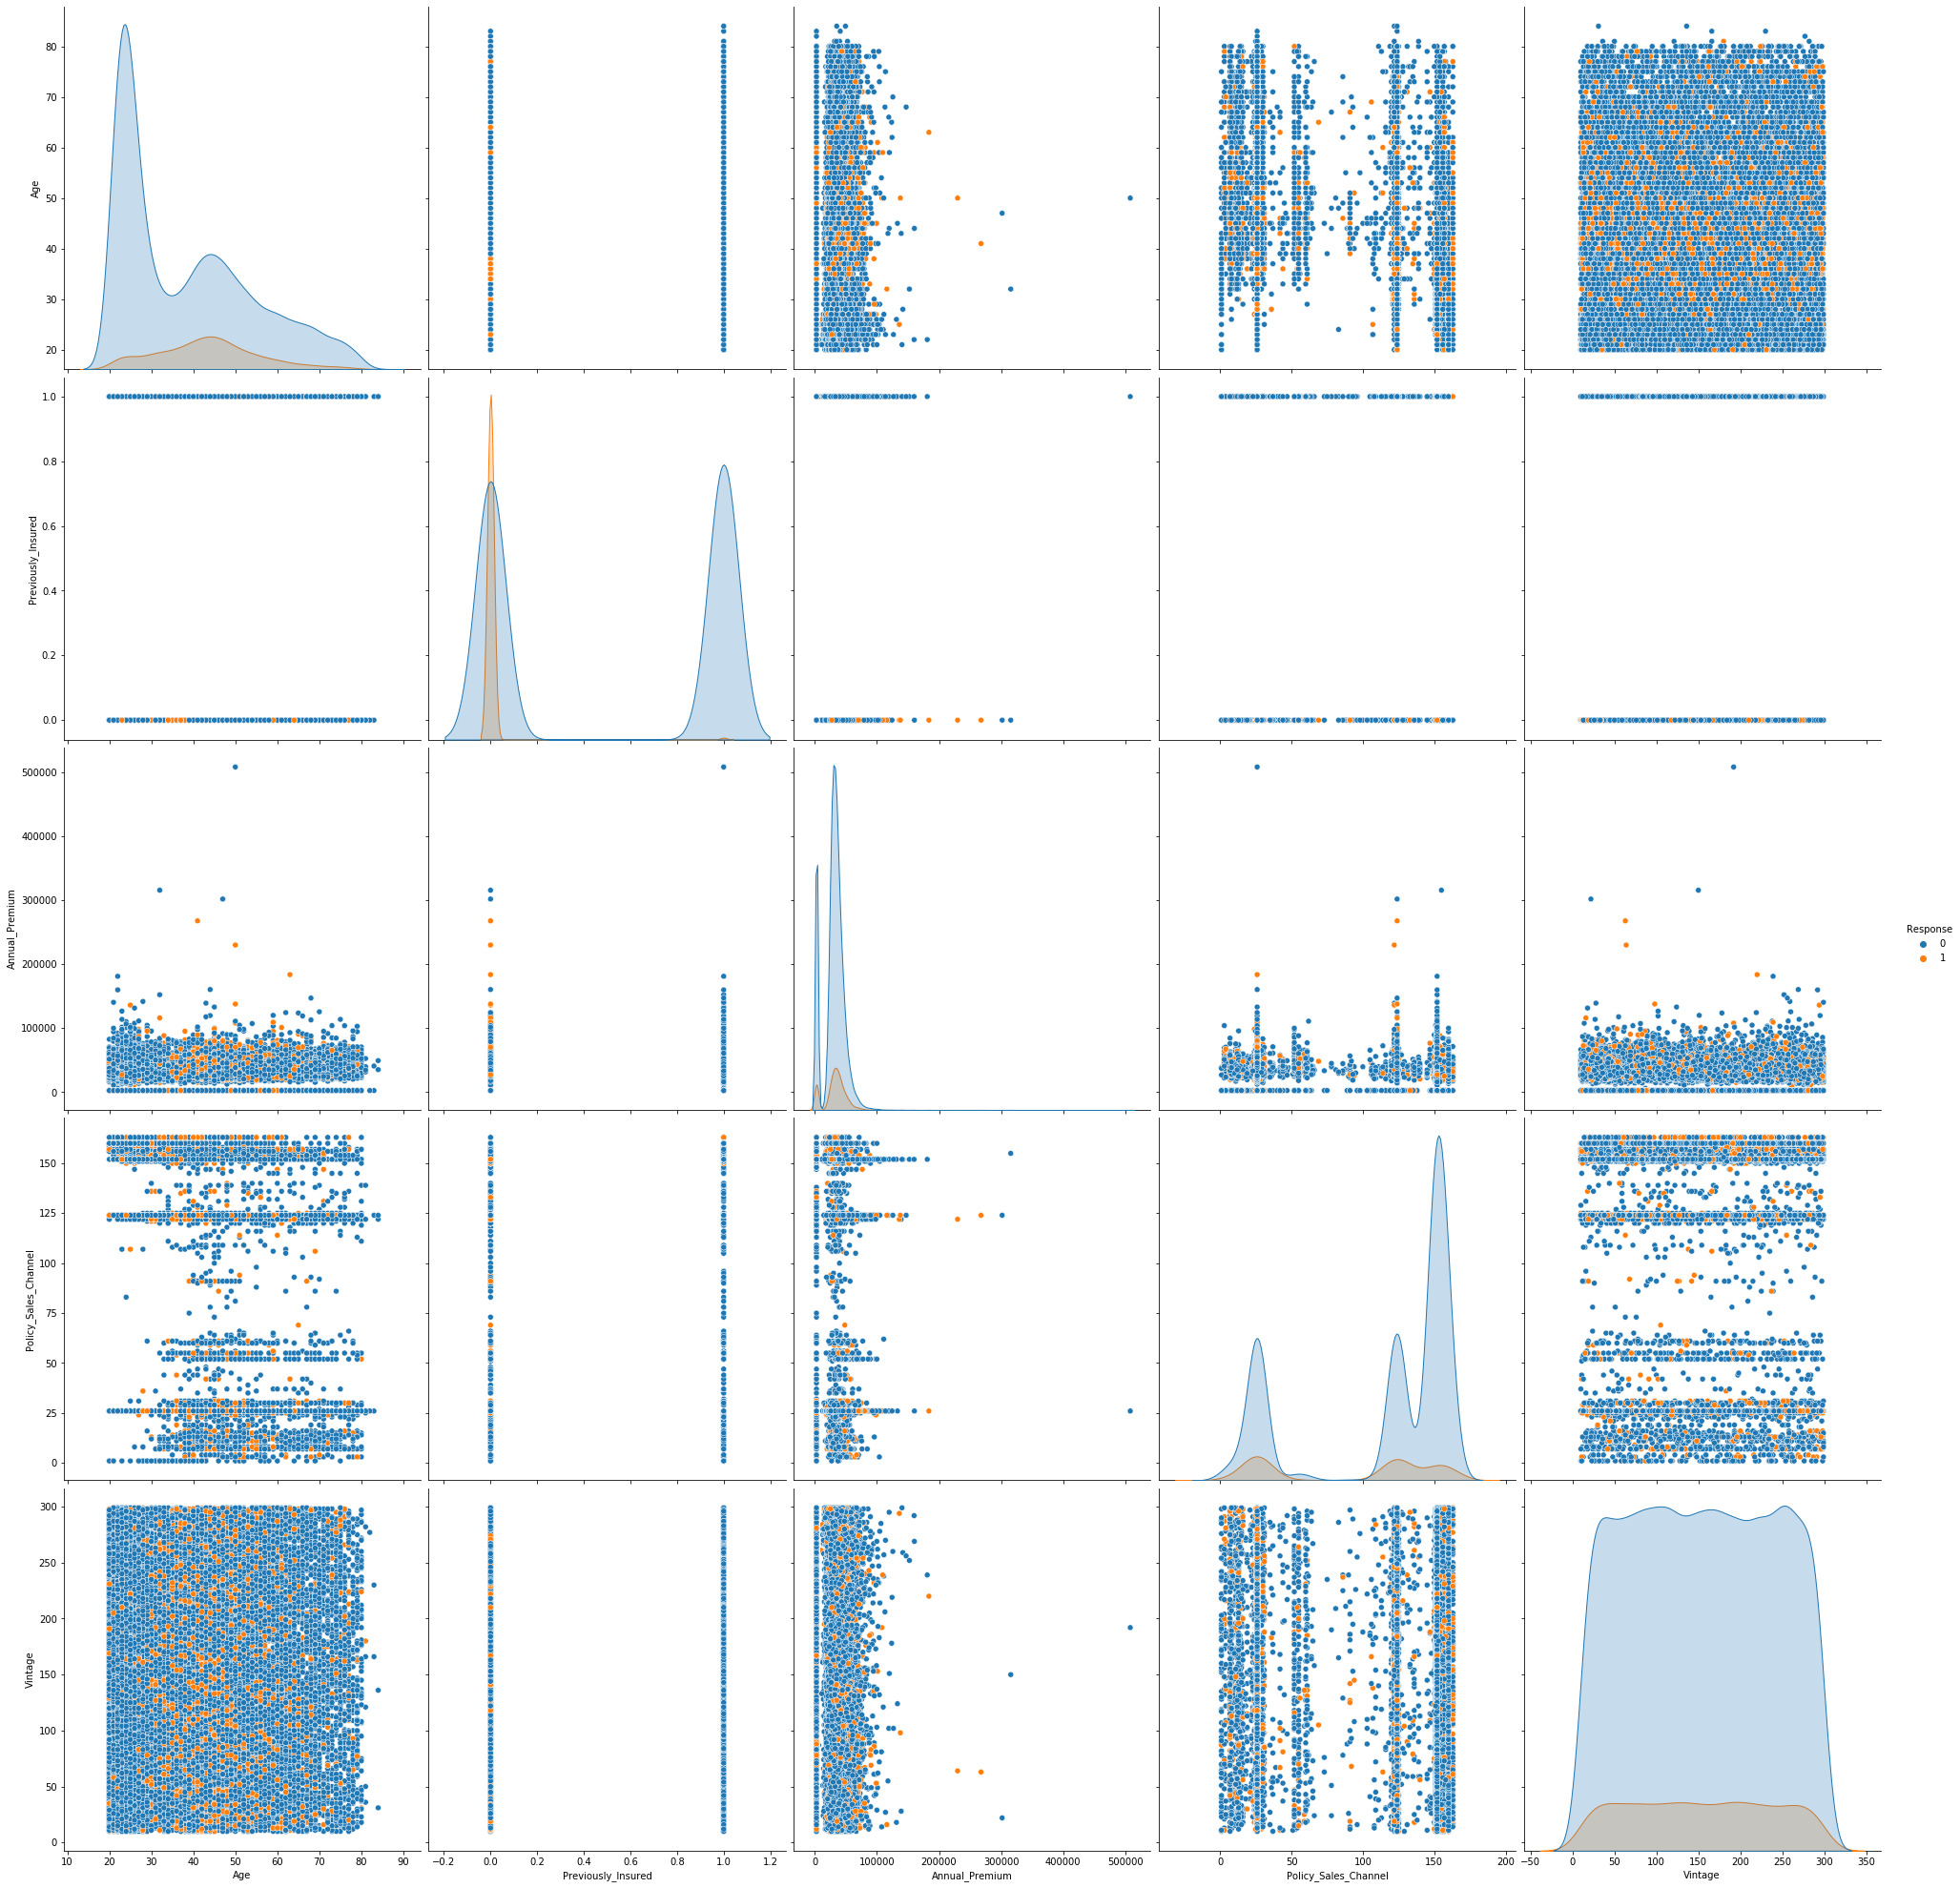

In [9]:
sns.pairplot(df[['Age','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']],hue='Response',size=5.6);

In [102]:

def label_encoder(sample,feature):
    label = LabelEncoder()
    sample[feature] = label.fit_transform(sample[feature])
    

In [103]:
label_encoder(df, 'Gender')
label_encoder(df, 'Vehicle_Age')
label_encoder(df, 'Vehicle_Damage')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [104]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [105]:
df.drop(['id','Gender','Region_Code','Driving_License'],axis=1,inplace = True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [106]:
df.head()

,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,44,0,2,1,40454.0,26.0,217,1
1,76,0,0,0,33536.0,26.0,183,0
2,47,0,2,1,38294.0,26.0,27,1
3,21,1,1,0,28619.0,152.0,203,0
4,29,1,1,0,27496.0,152.0,39,0


# Data Split 

In [107]:
from sklearn.model_selection import train_test_split

X=df.drop("Response",axis=1)
y=df.Response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

# Feature Standardization

In [108]:
from sklearn.preprocessing import StandardScaler


In [109]:
scaler=StandardScaler()
X_tr=scaler.fit_transform(X_train)
X_te=scaler.transform(X_test)

In [110]:
from imblearn.over_sampling import RandomOverSampler


# Machine Learning

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier



In [112]:
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=0))])
pipeline_randomforest=Pipeline([('rf_classifier',RandomForestClassifier())])
pipeline_knn=Pipeline([('knn_classifier',KNeighborsClassifier())])

In [113]:
pipelines = [pipeline_lr, pipeline_randomforest, pipeline_knn]

pipe_dict = {0: 'Logistic Regression', 1: 'RandomForest', 2: 'KNeighbors'}


In [114]:

for pipe in pipelines:
	pipe.fit(X_tr, y_train)

In [115]:
for i, model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_te,y_test)))

Logistic Regression Test Accuracy: 0.8804444444444445
RandomForest Test Accuracy: 0.8676666666666667
KNeighbors Test Accuracy: 0.8543333333333333


# Hyperparameter Tuning

In [116]:

RF = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':  [4, 5, 10, 20, 50, 75, 90, 100, 150, 200, 500, 1000]}]

grid_search_RF = GridSearchCV(RF, param_grid, cv=5 ,scoring='accuracy')
rf_model = grid_search_RF.fit(X_tr,y_train)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression(solver='liblinear',multi_class='auto')
param_grid = {
              'C' :[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2']}

grid_search_Lr = GridSearchCV(logreg, param_grid, cv=10 ,scoring='accuracy')
lr_model = grid_search_Lr.fit(X_tr,y_train)

In [118]:
KNN = KNeighborsClassifier()
param_grid = [{'n_neighbors': list(range(1,30)),
             'weights': ['uniform','distance']}]

grid_search_KNN = GridSearchCV(KNN, param_grid, cv=10 ,scoring='accuracy')
knn_model = grid_search_KNN.fit(X_tr,y_train)

# Test Data - KNN

In [119]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
import sklearn.metrics as metrics


In [120]:
knn_pred = knn_model.predict(X_te)
rf_pred = rf_model.predict(X_te)
lr_pred = lr_model.predict(X_te)


In [121]:
print(classification_report(y_test, knn_pred))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93      7924
           1       0.29      0.03      0.05      1076

    accuracy                           0.88      9000
   macro avg       0.59      0.51      0.49      9000
weighted avg       0.81      0.88      0.83      9000



In [122]:
print(confusion_matrix(y_test, knn_pred))

[[7859   65]
 [1049   27]]


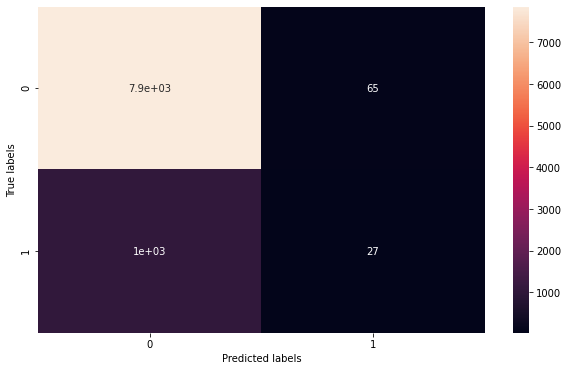

In [123]:
f, ax = plt.subplots(figsize=(10, 6))

cf_matrix_knn=confusion_matrix(y_test, knn_pred)


ax= plt.subplot()
sns.heatmap(cf_matrix_knn, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 


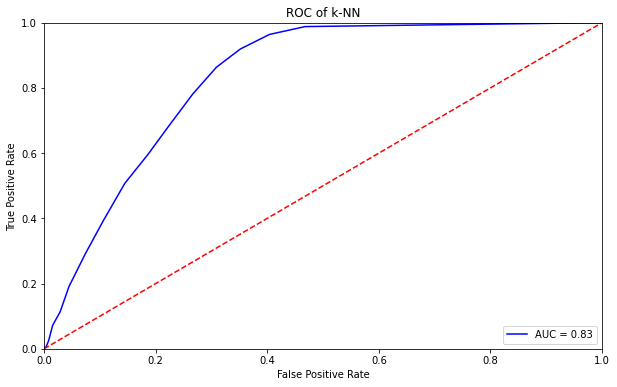

In [124]:
f, ax = plt.subplots(figsize=(10, 6))

probs = knn_model.predict_proba(X_te)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC of k-NN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Test Data - Random Forest

In [125]:
print(classification_report(y_test, rf_pred))


              precision    recall  f1-score   support

           0       0.89      0.96      0.93      7924
           1       0.35      0.15      0.21      1076

    accuracy                           0.87      9000
   macro avg       0.62      0.55      0.57      9000
weighted avg       0.83      0.87      0.84      9000



In [126]:
print(confusion_matrix(y_test, rf_pred))

[[7630  294]
 [ 918  158]]


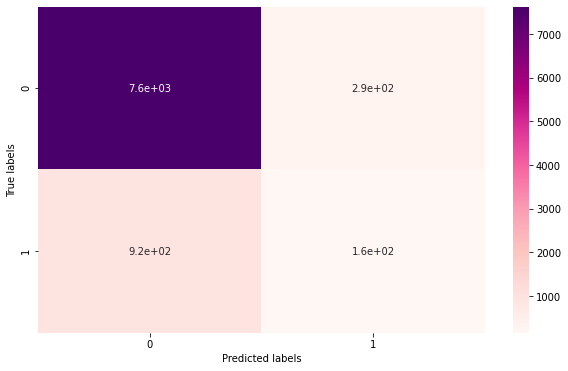

In [127]:
f, ax = plt.subplots(figsize=(10, 6))

cf_matrix_rf=confusion_matrix(y_test, rf_pred)



ax= plt.subplot()
sns.heatmap(cf_matrix_rf, annot=True, ax = ax, cmap='RdPu');

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');


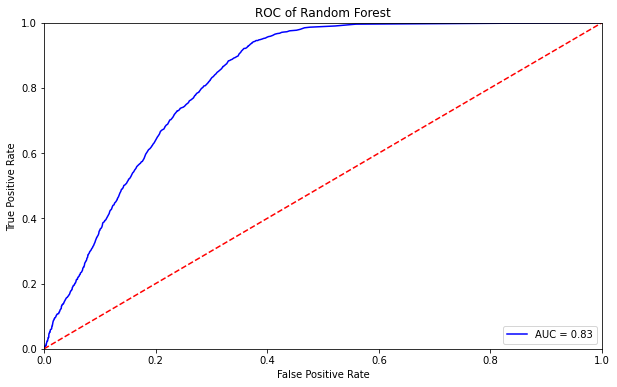

In [128]:
f, ax = plt.subplots(figsize=(10, 6))

probs = rf_model.predict_proba(X_te)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC of Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Test Data - LR

In [129]:
print(classification_report(y_test, lr_pred))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7924
           1       0.00      0.00      0.00      1076

    accuracy                           0.88      9000
   macro avg       0.44      0.50      0.47      9000
weighted avg       0.78      0.88      0.82      9000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
print(confusion_matrix(y_test, lr_pred))

[[7924    0]
 [1076    0]]


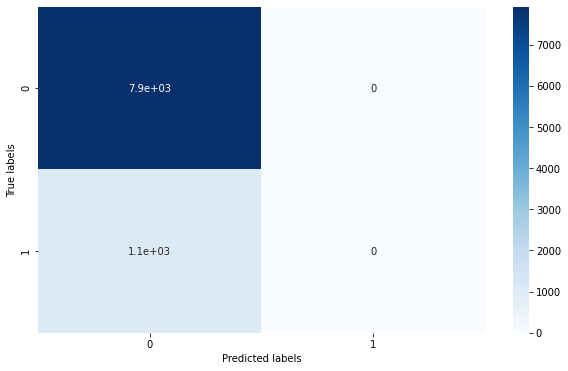

In [131]:
f, ax = plt.subplots(figsize=(10, 6))

cf_matrix_lr=confusion_matrix(y_test, lr_pred)



ax= plt.subplot()
sns.heatmap(cf_matrix_lr, annot=True, ax = ax, cmap= 'Blues');

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

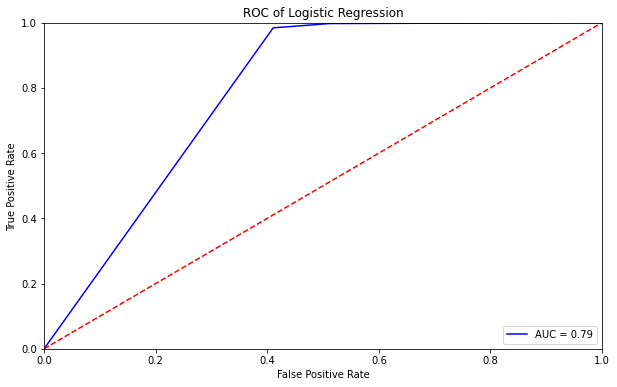

In [132]:
f, ax = plt.subplots(figsize=(10, 6))

probs = lr_model.predict_proba(X_te)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC of Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Oversampling

In [133]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


In [134]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_tr,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 18361, 1: 2639})
The number of classes after fit Counter({0: 18361, 1: 13770})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Models After Oversampling

In [135]:
RF = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':  [4, 5, 10, 20, 50, 75, 90, 100, 150, 200, 500, 1000]}]

grid_search_RF = GridSearchCV(RF, param_grid, cv=5 ,scoring='accuracy')
rf_modelo = grid_search_RF.fit(X_train_ns,y_train_ns)

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
param_grid = {
              'C' :[0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'penalty':['l1','l2']}

grid_search_Lr = GridSearchCV(logreg, param_grid, cv=5 ,scoring='accuracy')
lr_modelo = grid_search_Lr.fit(X_train_ns,y_train_ns)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

In [137]:
KNN = KNeighborsClassifier()
param_grid = [{'n_neighbors': list(range(1,30)),
             'weights': ['uniform','distance']}]

grid_search_KNN = GridSearchCV(KNN, param_grid, cv=5,scoring='accuracy')
knn_modelo = grid_search_KNN.fit(X_train_ns,y_train_ns)

In [138]:
knn_predo = knn_modelo.predict(X_test)
rf_predo = rf_modelo.predict(X_test)
lr_predo = lr_modelo.predict(X_test)

## k-NN Regression OS

In [139]:
print(classification_report(y_test, knn_predo))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7924
           1       0.00      0.00      0.00      1076

    accuracy                           0.88      9000
   macro avg       0.44      0.50      0.47      9000
weighted avg       0.78      0.88      0.82      9000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
print(confusion_matrix(y_test, knn_predo))

[[7924    0]
 [1076    0]]


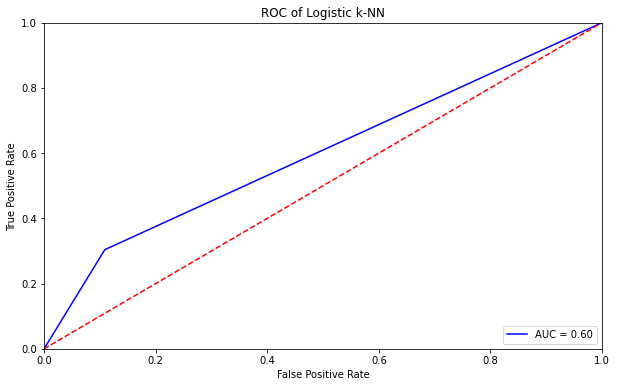

In [141]:
f, ax = plt.subplots(figsize=(10, 6))

probs = knn_modelo.predict_proba(X_te)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC of Logistic k-NN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression OS

In [142]:
print(classification_report(y_test, lr_predo))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7924
           1       0.12      1.00      0.21      1076

    accuracy                           0.12      9000
   macro avg       0.06      0.50      0.11      9000
weighted avg       0.01      0.12      0.03      9000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
print(confusion_matrix(y_test, lr_predo))

[[   0 7924]
 [   0 1076]]


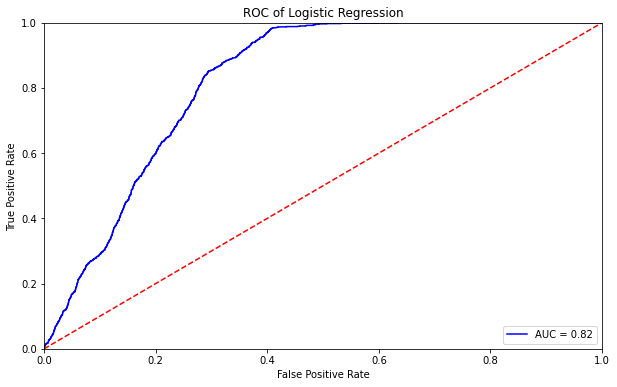

In [144]:
f, ax = plt.subplots(figsize=(10, 6))

probs = lr_modelo.predict_proba(X_te)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC of Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest OS

In [145]:
print(classification_report(y_test, rf_predo))


              precision    recall  f1-score   support

           0       1.00      0.52      0.68      7924
           1       0.22      0.99      0.36      1076

    accuracy                           0.58      9000
   macro avg       0.61      0.76      0.52      9000
weighted avg       0.91      0.58      0.64      9000



In [146]:
print(confusion_matrix(y_test, rf_predo))

[[4120 3804]
 [   7 1069]]


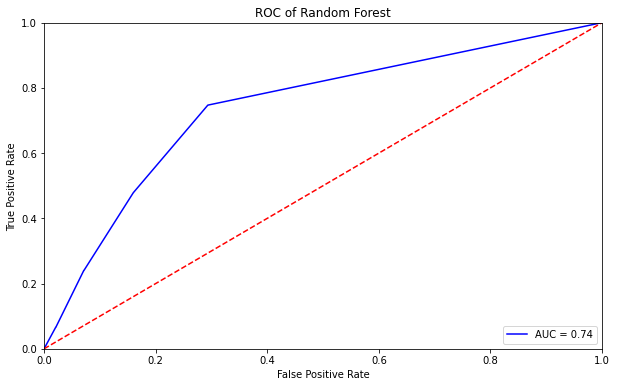

In [147]:
f, ax = plt.subplots(figsize=(10, 6))

probs = rf_modelo.predict_proba(X_te)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC of Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Feature Importance

In [148]:
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_tr, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [149]:
feature_importances = random_forest_model.feature_importances_
feature_importances



array([0.19224111, 0.04784806, 0.01767885, 0.07753895, 0.27284801,
       0.0879992 , 0.30384581])

Age                     0.192241
Previously_Insured      0.047848
Vehicle_Age             0.017679
Vehicle_Damage          0.077539
Annual_Premium          0.272848
Policy_Sales_Channel    0.087999
Vintage                 0.303846
dtype: float64

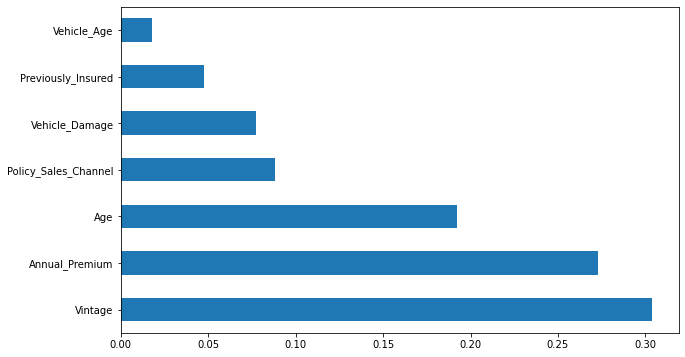

In [150]:
f, ax = plt.subplots(figsize=(10, 6))

feat_importances = pd.Series(random_forest_model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
feat_importances

## Optimal Parameters

In [151]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'knn': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': list(range(1,30)),
            'weights': ['uniform','distance']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [4, 5, 10, 20, 50, 75, 90, 100, 150, 200, 500, 1000]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'penalty':['l1', 'l2']
            
        }
    }
}

In [152]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_te, y_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    
    })
    


In [153]:
results = pd.DataFrame(scores,columns=['model','best_score','best_params'])
results

,model,best_score,best_params
0,knn,0.878667,"{'n_neighbors': 28, 'weights': 'uniform'}"
1,random_forest,0.867222,{'n_estimators': 200}
2,logistic_regression,0.880444,"{'C': 0.001, 'penalty': 'l1'}"
